# Cirq

## Installation

``pip install cirq``

## Funktionstest

In [82]:
import cirq
import math
import numpy as np

print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


## Hello Qubit

In [83]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.measure(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───M───


# NOT

In [84]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───X───M───


# CNOT

In [85]:
# pick qubits
qubit0 = cirq.LineQubit(0) # position 0
qubit1 = cirq.LineQubit(1) # position 1

circuit = cirq.Circuit()
circuit.append(cirq.CNOT(control=qubit0, target=qubit1))
circuit.append(cirq.measure(qubit1))

print("Circuit")
print(circuit)

Circuit
0: ───@───────
      │
1: ───X───M───


## Hadamard

Circuit
0: ───H───M───
Result
0=00110011011011010100100010100000110010000101011110101001100011011010111001101101000000000001100011111100001100100100110010100011111001011100100001010000010011100110000001001011001001110000101000011001100110010011001010100111111111111011111110000000111111010111111011000001110001010001010000000001000001011001111000111000111011111101101010011110110100000001100000101101100100110101111111111100000100000101010110111110001000001100010110101111010100100010000101000110001001101010011101111001001010111011000010101111001110000001011010110101001000001101101011000111000101100110110001000011100110010101100110100000011010100010111001010000000001010110001111010101100001100110001011110111110100111100111011010011111101100010101110110101110111001000100111101001110100000011000110110111111010100011001010010110011001111001011101001000000111001001000000111000100001111101111001011110111101010101001111000001110001111011100000011000000000001001011001000111100000110101000100110000

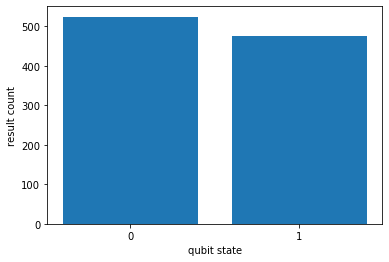

array([524., 476.])

In [86]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit with HADAMARD
circuit = cirq.Circuit(
    cirq.H(qubit),
    cirq.measure(qubit)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("Result")
print(result)

cirq.plot_state_histogram(result)

# Deutsch Algorithm

#### Structure of Circuits in Cirq
- **Circuit:** Collection of Moments
- **Moment:** Collection of Operations at a specific time
- **Operation:** Effect that operates on a specific subset of qubits

In [363]:
# 2 qubits
qubit0 = cirq.LineQubit(0)
qubit1 = cirq.LineQubit(1)

def get_oracle_gate(oracle):
    # if oracle is constant
    if oracle == "c":
        c = np.random.randint(2)
        if c == 1:
            return [cirq.I(qubit0), cirq.X(qubit1)]
        else:
            return [cirq.I(qubit0), cirq.I(qubit1)]
    # if oracle is balanced
    else:
        return cirq.CNOT(control=qubit0, target=qubit1)

# moments
moment_h_all = cirq.Moment( [cirq.H(qubit0), cirq.H(qubit1)] )
moment_m_all = cirq.Moment( [cirq.measure(qubit0), cirq.measure(qubit1)] )

# circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit1))
circuit.append(moment_h_all)

circuit.append(get_oracle_gate("c")) # insert oracle gate

circuit.append(moment_h_all)
circuit.append(moment_m_all)

#circuit.append(cirq.H(qubit0))
#circuit.append(cirq.measure(qubit0))

print("Circuit")
print(circuit)

Circuit
0: ───────H───I───H───M───

1: ───X───H───X───H───M───


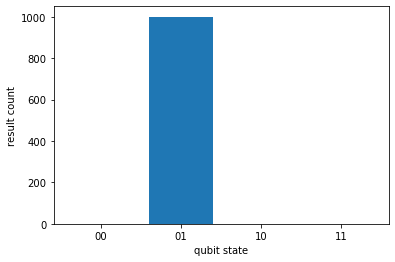

array([   0., 1000.,    0.,    0.])

In [364]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)

# Deutsch-Josza Algorithm

In [294]:
# n qubits
n_qubits = 1

# pick up qubits
qubits = [cirq.LineQubit(x) for x in range(n_qubits+1)]

# gates
gate_x_last = cirq.X(qubits[n_qubits])
gate_h_all = [cirq.H(qubit) for qubit in qubits]
gate_m_all = [cirq.measure(qubit) for qubit in qubits]
gate_h_all_ex_last = [cirq.H(qubit) for qubit in qubits[:-1]]
gate_m_all_ex_last = [cirq.measure(qubit) for qubit in qubits[:-1]]

# oracle gates
gate_oracle_const_0 = [cirq.I(qubit) for qubit in qubits]
gate_oracle_const_1 = [cirq.I(qubits[0]), cirq.X(qubits[1])]

gate_oracle_balanced_00_11 = [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]
gate_oracle_balanced_01_10 = [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]
gate_oracle_balanced_01_10.append(cirq.X(qubits[1]))

In [299]:
# oracle function. implements one of the four functions
# balanced -> [f(0) = 0, f(1) = 1] [f(0) = 1, f(1) = 0]
# constant -> [f(0) = 0, f(1) = 0] [f(0) = 1, f(1) = 1]

# set the oracle, b for balanced, c for constant
oracle = "b"

# if the oracle is balanced, set the hidden bitstring, b
if oracle == "b":
    b = 3 # np.random.randint(1,2**n) uncomment for a random value

# if the oracle is constant, set c = 0 or 1 randomly.
if oracle == "c":
    c = np.random.randint(2)
    print("Constant", c)
    
# Query the oracle 
if oracle == "c": # if the oracle is constant, return c
    if c == 1:
        gate_oracle = gate_oracle_const_1
    else:
        gate_oracle = gate_oracle_const_0
else: # otherwise, the oracle is balanced and it returns the inner product of the input with b (non-zero bitstring) 
    gate_oracle = gate_oracle_balanced_01_10

In [300]:
# moments
moment_x_last = cirq.Moment([gate_x_last])
moment_h_all = cirq.Moment(gate_h_all)
moment_m_all = cirq.Moment(gate_m_all)
moment_h_all_ex_last = cirq.Moment(gate_h_all_ex_last)
moment_m_all_ex_last = cirq.Moment(gate_m_all_ex_last)

In [301]:
# circuit
circuit = cirq.Circuit()
circuit.append(moment_x_last)
circuit.append(moment_h_all)

circuit.append(gate_oracle)

circuit.append(moment_h_all)
circuit.append(moment_m_all)

print("Circuit")
print(circuit)

Circuit
0: ───────H───@───────H───M───
              │
1: ───X───H───X───X───H───M───


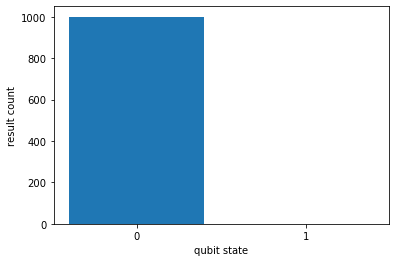

array([1000.,    0.])

In [312]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)